# Experiments and results

### imports

In [1]:
from utils import lmo_fro, lmo_spectral, prox_l1, grad_gb, prox_mcp, spectral_prox_l1
from BCD import load_dataset, Hadamard_BCD

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

from tqdm import tqdm

from problems import generateWH, run_MoreauNSD, run_VS

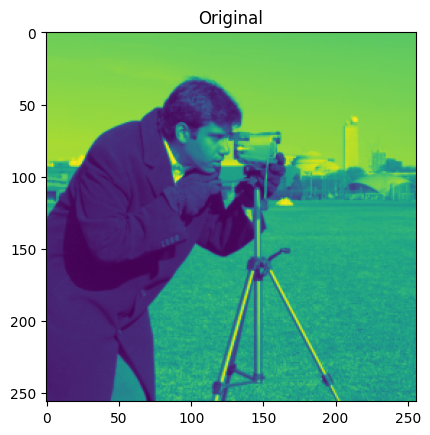

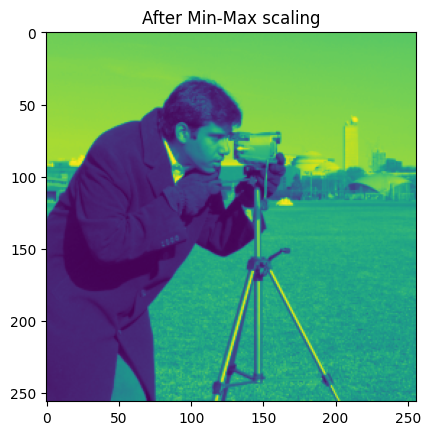

(256, 256)


In [2]:
# D = load_dataset("synthetic", m = 250, n = 250)
# D = load_dataset("olivetti")
D = load_dataset("camera")
# D = load_dataset("spectrometer")
# D = load_dataset("football")
# D = load_dataset("miserables")
# D = load_dataset("low_rank_synthetic")
# from scipy.linalg import svd
plt.imshow(D)
plt.title('Original')
plt.show()

# Min-Max Scaling
# Apply to each column (axis=0)
min_vals = D.min()
max_vals = D.max()

D = (D - min_vals) / (max_vals - min_vals)

plt.title('After Min-Max scaling')
plt.imshow(D)
plt.show()

# # Normalization
# D /= np.linalg.norm(D, 'fro')
# plt.title('After normalization')
# plt.imshow(D)
# plt.show()

print(D.shape)

## Experiments with rank = 10

### Run algorithms

In [3]:
rank = 10
# m = 200
# n = 1000
# W1, H1, W2, H2, error, times = Hadamard_BCD(D, r=rank, maxiter= 10)

# W = W1*W2
# H = H1*H2
# W, H = generateWH(m, n, rank)
# D = W@H
# plt.imshow(D)
# F_min = np.linalg.norm(W, 1)
def g(W):
    s = svd(W, compute_uv=False)
    # S = np.zeros((m,rank))
    # for i in range(len(s)):
    #     S[i, i] = np.abs(s[i])
    return np.sum(np.abs(s))# U@S@Vt


print(D.shape)
norm_D = np.linalg.norm(D, 'fro')**2
print(norm_D)
# D /= norm_D

F_min = g(D)
K = 5_000

prox = spectral_prox_l1
# prox = prox_l1


loss_NSD, dist_W_prox_NSD, WHs_NSD = run_MoreauNSD(D, rank, prox, max_iter = K)
# loss_cvxNSD, dist_W_prox_cvxNSD, WHs_cvxNSD = run_cvxMoreauNSD(D, rank, prox, max_iter = K)

# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")

# loss = run_MoreauNSD(D, 10, lmo = lmo_fro)
# plt.semilogy(loss/norm_D, label = 'l2 lmo')

loss_VS, dist_W_prox_VS, WHs_VS = run_VS(D, rank, prox, max_iter = K)


(256, 256)
21966.858894772507


100%|██████████| 5000/5000 [00:01<00:00, 2548.65it/s]


Text(0.5, 1.0, 'VS')

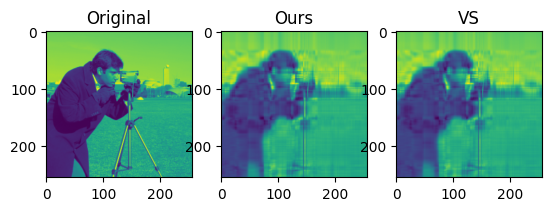

In [4]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(D)
ax[0].set_title('Original')

W, H = WHs_NSD[-1]
ax[1].imshow(norm_D*W@H)
ax[1].set_title('Ours')

W, H = WHs_VS[-1]
ax[2].imshow(W@H)
ax[2].set_title('VS')

# W, H = WHs_cvxNSD[-1]
# ax[3].imshow(norm_D*W@H)
# ax[3].set_title('Ours (CVX MNSD)')


In [5]:
W, H = WHs_NSD[-1]
s = svd(W, compute_uv=False)
print(s)
print(s.sum())
W, H = WHs_VS[-1]
s = svd(W, compute_uv=False)
print(s)
print(s.sum())

[5.9115939  1.28467174 1.00602457 0.68774408 0.45353008 0.33289455
 0.28469135 0.27205105 0.26787931 0.24818046]
10.749261076406833
[8.3068804  2.06176506 1.73999304 1.32887897 1.03028703 0.79937007
 0.78652435 0.69940294 0.64734671 0.4762843 ]
17.876732866103673


### Plots

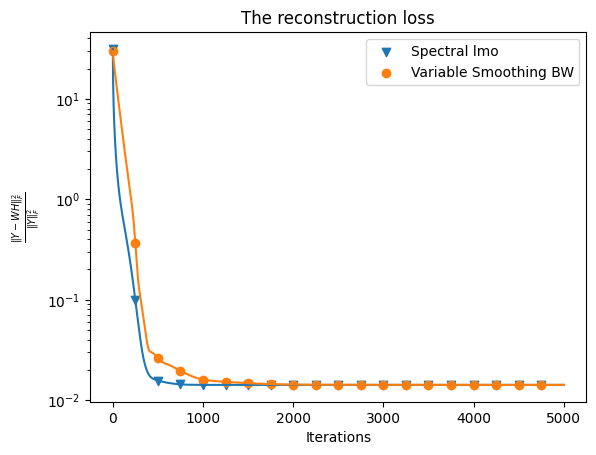

In [6]:
scatter_period = K // 20

plt.semilogy(loss_NSD/norm_D)
plt.scatter(np.arange(len(loss_NSD))[::scatter_period], loss_NSD[::scatter_period]/norm_D, label = 'Spectral lmo', marker="v")

plt.semilogy(loss_VS/norm_D)
plt.scatter(np.arange(len(loss_VS))[::scatter_period], loss_VS[::scatter_period]/norm_D, label = 'Variable Smoothing BW', marker="o")

# plt.semilogy(loss_cvxNSD/norm_D)
# plt.scatter(np.arange(len(loss_cvxNSD))[::scatter_period], loss_cvxNSD[::scatter_period]/norm_D, label = 'Acc Spectral lmo', marker="^")
# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# W1, H1, W2, H2, error, times = Hadamard_BCD(D, r=rank, maxiter= K)
# print(len(error))
# plt.semilogy(error)
# plt.scatter(np.arange(len(error))[::50], error[::50], label = 'BCD', marker="^")

plt.ylabel(r'$\frac{\|Y - WH\|_F^2}{\|Y\|_F^2}$')
plt.xlabel('Iterations')
plt.title('The reconstruction loss')

plt.legend()
plt.show()
    

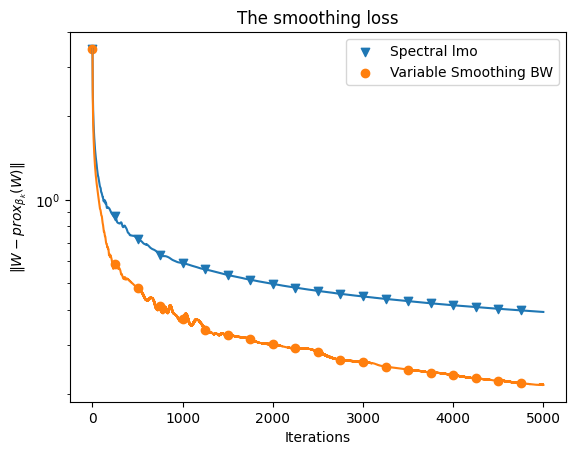

In [7]:
plt.semilogy(dist_W_prox_NSD)
plt.scatter(np.arange(len(dist_W_prox_NSD))[::scatter_period], dist_W_prox_NSD[::scatter_period], label = 'Spectral lmo', marker="v")

plt.semilogy(dist_W_prox_VS)
plt.scatter(np.arange(len(dist_W_prox_VS))[::scatter_period], dist_W_prox_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")


plt.ylabel(r'$\|W - prox_{\beta_k}(W)\|$')
plt.xlabel('Iterations')
plt.title('The smoothing loss')

plt.legend()
plt.show()

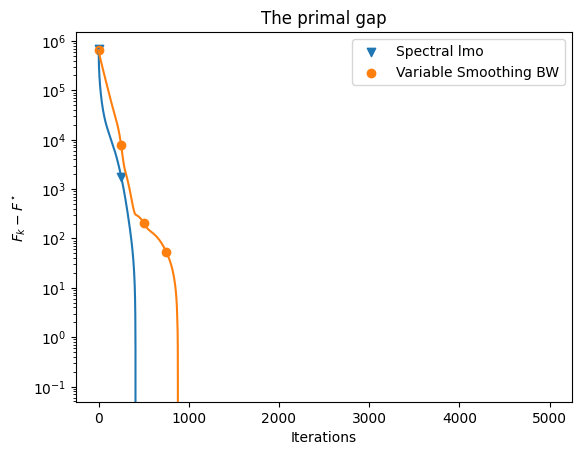

In [8]:
ls_NSD = np.zeros(K+1)
g_NSD = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_NSD):
    g_NSD[i] = g(W)
    ls_NSD[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_NSD[i] - F_min
plt.semilogy(ls_NSD)
plt.scatter(np.arange(len(ls_NSD))[::scatter_period], ls_NSD[::scatter_period], label = 'Spectral lmo', marker="v")

ls_VS = np.zeros(K+1)
g_VS = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_VS):
    g_VS[i] = g(W)
    ls_VS[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_VS[i] - F_min
plt.semilogy(ls_VS)
plt.scatter(np.arange(len(ls_VS))[::scatter_period], ls_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

plt.ylabel(r'$F_k - F^\star$')
plt.xlabel('Iterations')
plt.title('The primal gap')

plt.legend()
plt.show()
    

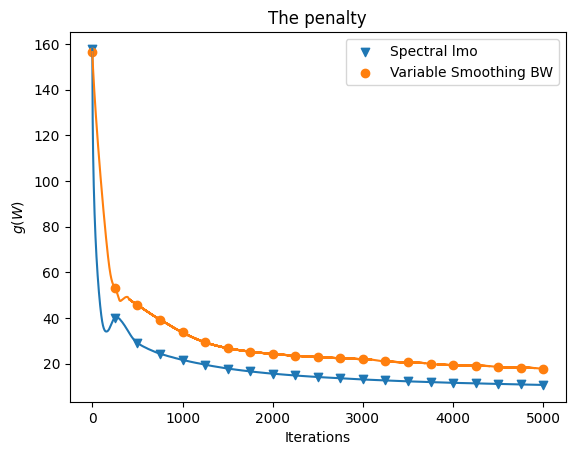

In [9]:
plt.plot(g_NSD)
plt.scatter(np.arange(len(g_NSD))[::scatter_period], g_NSD[::scatter_period], label = 'Spectral lmo', marker="v")

plt.plot(g_VS)
plt.scatter(np.arange(len(g_VS))[::scatter_period], g_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

plt.ylabel(r'$g(W)$')
plt.xlabel('Iterations')
plt.title('The penalty')

plt.legend()
plt.show()

## Experiments with rank = 20

### Run algorithms

In [10]:
rank = 20
# m = 200
# n = 1000
# W1, H1, W2, H2, error, times = Hadamard_BCD(D, r=rank, maxiter= 10)

# W = W1*W2
# H = H1*H2
# W, H = generateWH(m, n, rank)
# D = W@H
# plt.imshow(D)
# F_min = np.linalg.norm(W, 1)
def g(W):
    s = svd(W, compute_uv=False)
    # S = np.zeros((m,rank))
    # for i in range(len(s)):
    #     S[i, i] = np.abs(s[i])
    return np.sum(np.abs(s))# U@S@Vt


print(D.shape)
norm_D = np.linalg.norm(D, 'fro')**2
print(norm_D)
# D /= norm_D

F_min = g(D)
K = 5_000

prox = spectral_prox_l1
# prox = prox_l1


loss_NSD, dist_W_prox_NSD, WHs_NSD = run_MoreauNSD(D, rank, prox, max_iter = K)
# loss_cvxNSD, dist_W_prox_cvxNSD, WHs_cvxNSD = run_cvxMoreauNSD(D, rank, prox, max_iter = K)

# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")

# loss = run_MoreauNSD(D, 10, lmo = lmo_fro)
# plt.semilogy(loss/norm_D, label = 'l2 lmo')

loss_VS, dist_W_prox_VS, WHs_VS = run_VS(D, rank, prox, max_iter = K)


(256, 256)
21966.858894772507


100%|██████████| 5000/5000 [00:03<00:00, 1645.37it/s]


Text(0.5, 1.0, 'VS')

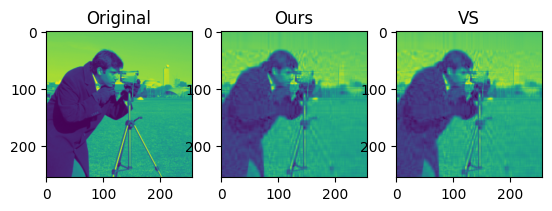

In [11]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(D)
ax[0].set_title('Original')

W, H = WHs_NSD[-1]
ax[1].imshow(norm_D*W@H)
ax[1].set_title('Ours')

W, H = WHs_VS[-1]
ax[2].imshow(W@H)
ax[2].set_title('VS')

# W, H = WHs_cvxNSD[-1]
# ax[3].imshow(norm_D*W@H)
# ax[3].set_title('Ours (CVX MNSD)')


In [12]:
W, H = WHs_NSD[-1]
s = svd(W, compute_uv=False)
# print(s)
print('Sum of the singular values for our algo', s.sum())
W, H = WHs_VS[-1]
s = svd(W, compute_uv=False)
# print(s)
print('Sum of the singular values for the VS algo', s.sum())

Sum of the singular values for our algo 12.207203612969247
Sum of the singular values for the VS algo 22.88768584994547


### Plots

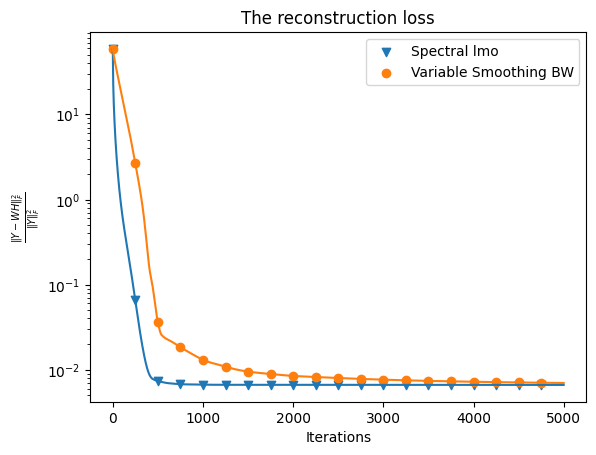

In [13]:
scatter_period = K // 20

plt.semilogy(loss_NSD/norm_D)
plt.scatter(np.arange(len(loss_NSD))[::scatter_period], loss_NSD[::scatter_period]/norm_D, label = 'Spectral lmo', marker="v")

plt.semilogy(loss_VS/norm_D)
plt.scatter(np.arange(len(loss_VS))[::scatter_period], loss_VS[::scatter_period]/norm_D, label = 'Variable Smoothing BW', marker="o")

# plt.semilogy(loss_cvxNSD/norm_D)
# plt.scatter(np.arange(len(loss_cvxNSD))[::scatter_period], loss_cvxNSD[::scatter_period]/norm_D, label = 'Acc Spectral lmo', marker="^")
# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# plt.semilogy(loss/norm_D)
# plt.scatter(np.arange(len(loss))[::50], loss[::50]/norm_D, label = 'Spectral lmo', marker="v")
# W1, H1, W2, H2, error, times = Hadamard_BCD(D, r=rank, maxiter= K)
# print(len(error))
# plt.semilogy(error)
# plt.scatter(np.arange(len(error))[::50], error[::50], label = 'BCD', marker="^")

plt.ylabel(r'$\frac{\|Y - WH\|_F^2}{\|Y\|_F^2}$')
plt.xlabel('Iterations')
plt.title('The reconstruction loss')

plt.legend()
plt.show()
    

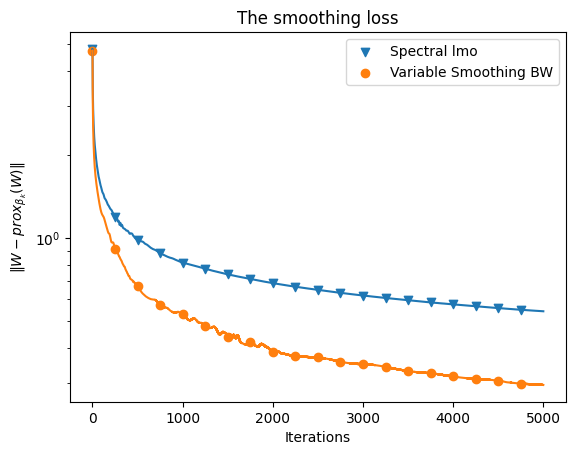

In [14]:
plt.semilogy(dist_W_prox_NSD)
plt.scatter(np.arange(len(dist_W_prox_NSD))[::scatter_period], dist_W_prox_NSD[::scatter_period], label = 'Spectral lmo', marker="v")

plt.semilogy(dist_W_prox_VS)
plt.scatter(np.arange(len(dist_W_prox_VS))[::scatter_period], dist_W_prox_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")


plt.ylabel(r'$\|W - prox_{\beta_k}(W)\|$')
plt.xlabel('Iterations')
plt.title('The smoothing loss')

plt.legend()
plt.show()

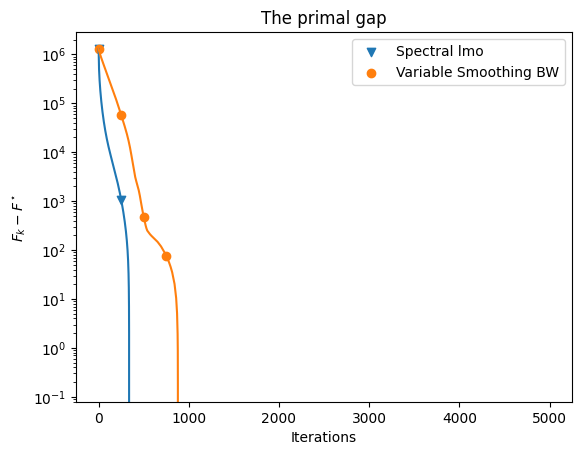

In [15]:
ls_NSD = np.zeros(K+1)
g_NSD = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_NSD):
    g_NSD[i] = g(W)
    ls_NSD[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_NSD[i] - F_min
plt.semilogy(ls_NSD)
plt.scatter(np.arange(len(ls_NSD))[::scatter_period], ls_NSD[::scatter_period], label = 'Spectral lmo', marker="v")

ls_VS = np.zeros(K+1)
g_VS = np.zeros(K+1)
for i, (W, H) in enumerate(WHs_VS):
    g_VS[i] = g(W)
    ls_VS[i] = np.linalg.norm(D - W@H, 'fro')**2 + g_VS[i] - F_min
plt.semilogy(ls_VS)
plt.scatter(np.arange(len(ls_VS))[::scatter_period], ls_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

plt.ylabel(r'$F_k - F^\star$')
plt.xlabel('Iterations')
plt.title('The primal gap')

plt.legend()
plt.show()
    

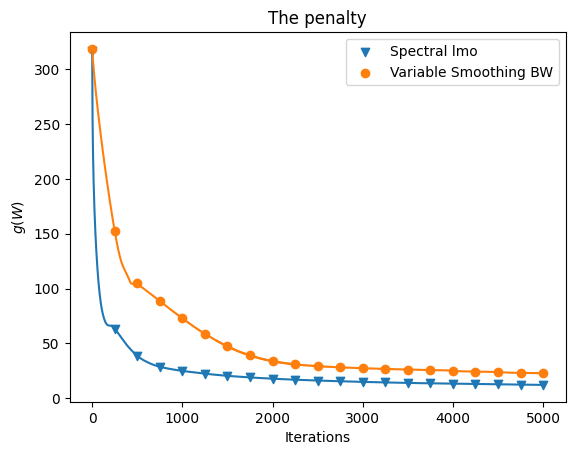

In [16]:
plt.plot(g_NSD)
plt.scatter(np.arange(len(g_NSD))[::scatter_period], g_NSD[::scatter_period], label = 'Spectral lmo', marker="v")

plt.plot(g_VS)
plt.scatter(np.arange(len(g_VS))[::scatter_period], g_VS[::scatter_period], label = 'Variable Smoothing BW', marker="o")

plt.ylabel(r'$g(W)$')
plt.xlabel('Iterations')
plt.title('The penalty')

plt.legend()
plt.show()